# In this case study we are analyzing Big Mart Sales Data and we will use ***Machine Learning*** Algorithms and see which Algorithm model is best suited for ***sales prediction or forecasting***.

Importing the libraries

In [1]:
import numpy as np                                        # for creating numpy arrays
import pandas as pd                                       # for creating pandas dataframe
import matplotlib.pyplot as plt                           # for Visualization
import seaborn as sns                                     # for Visualization
from sklearn.preprocessing import LabelEncoder            # for Label Encoding on categorical data
from sklearn.model_selection import train_test_split      # for splitting data
from xgboost import XGBRegressor                          # ML Model
from sklearn.linear_model import LinearRegression         # ML Model
from sklearn import metrics                               # to find performance of ML model

## Data Collection and Processing
The data is opensource data available on Kaggle.

In [3]:
# loading the data from csv file to Pandas DataFrame
df = pd.read_csv('/content/Train.csv')

In [4]:
# first 5 rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# number of data points(Rows) & number of features(Columns)
df.shape

(8523, 12)

In [6]:
# getting some information about null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Following are the Categorical Features we have in our Dataset:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [7]:
# checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

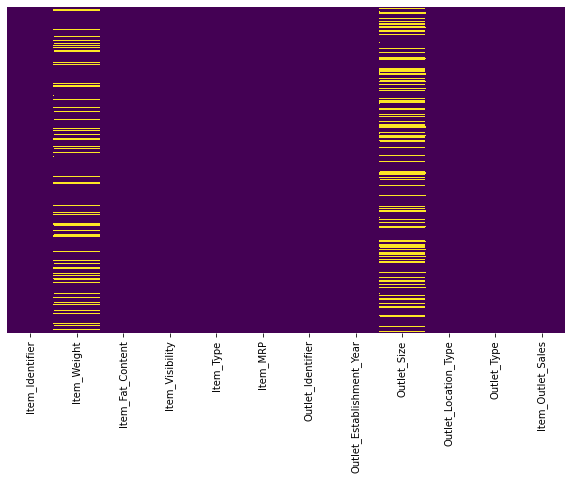

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From above Heatmap we can see there are NULL values present in Item_Weight and Outlet_Size columns. We need to handle these null values.

## Handling NULL Values

Mean is average (will use it for continuous data here 'item_weight')

Mode is more repeated or frequent value (will use it for categorical data here 'outlet_size' because we can't find mean on string datatype)

In [9]:
# mean value of "Item_Weight" column
df['Item_Weight'].mean()

12.857645184135976

In [10]:
# null value imputation
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [11]:
# checking item_weight null values are replaced with Mean value
df.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [13]:
# filling the missing values in "Outlet_Size" column with Mode
# Calculating mode of outlet_size for each outlet_type
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
miss_values = df['Outlet_Size'].isnull()   

In [16]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [17]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [18]:
# checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical Features Analysis

In [20]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


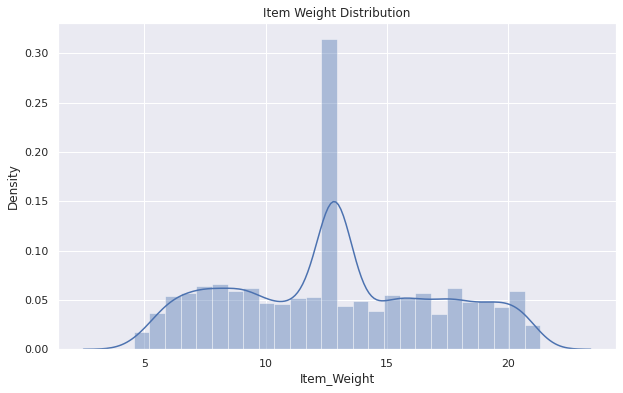

In [21]:
# Item_Weight distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


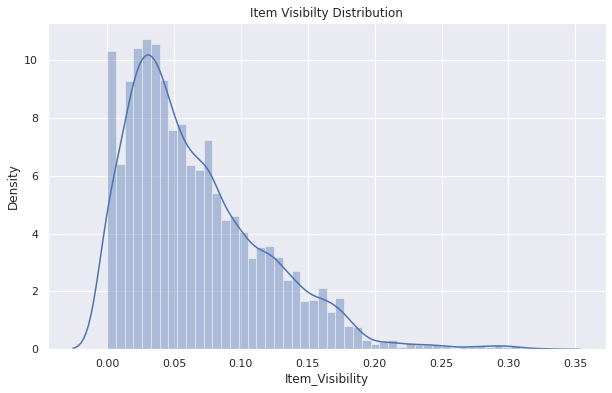

In [22]:
# Item Visibility distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Visibility'])
plt.title('Item Visibilty Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


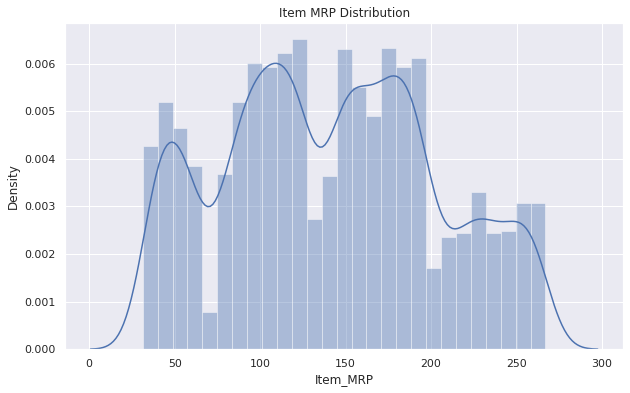

In [23]:
# Item MRP distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Item_MRP'])
plt.title('Item MRP Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


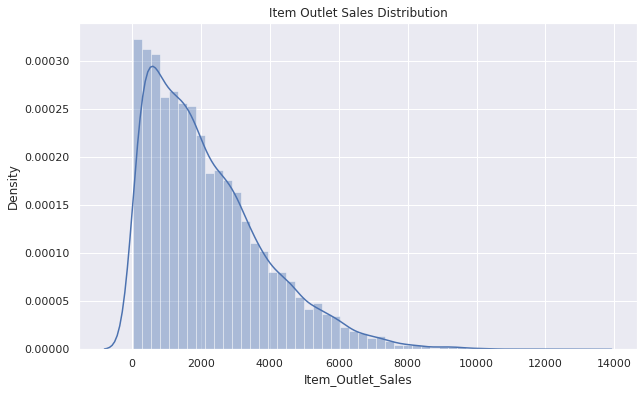

In [24]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.show()

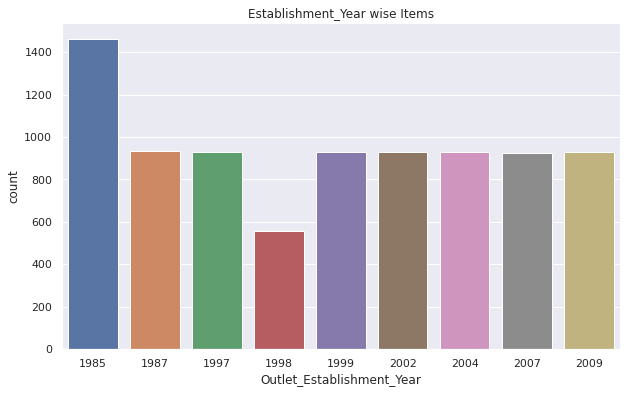

In [25]:
# Outlet_Establishment_Year
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.title('Establishment_Year wise Items')
plt.show()

In 1985 we have the maximum number of items introduced and the least is in 1998. Other years have similar numbers.

### Categorical Features Analysis

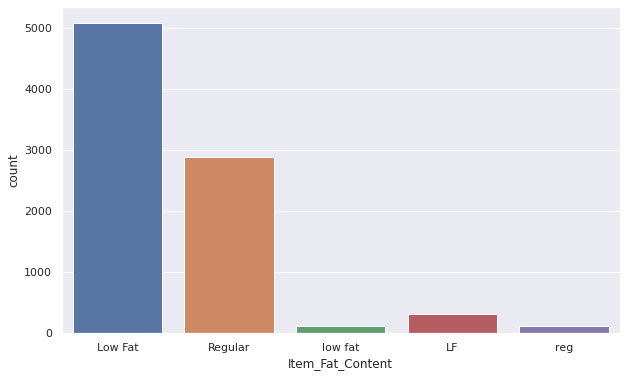

In [26]:
# Item_Fat_Content
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

From above chart we can see that there is some data cleaning needed in Item_Fat_Content column as 'Low Fat', 'low fat' and 'LF' are the same type and 'Regular' have the same category as 'reg' too. I have done cleaning below in Data Preprocessing part.

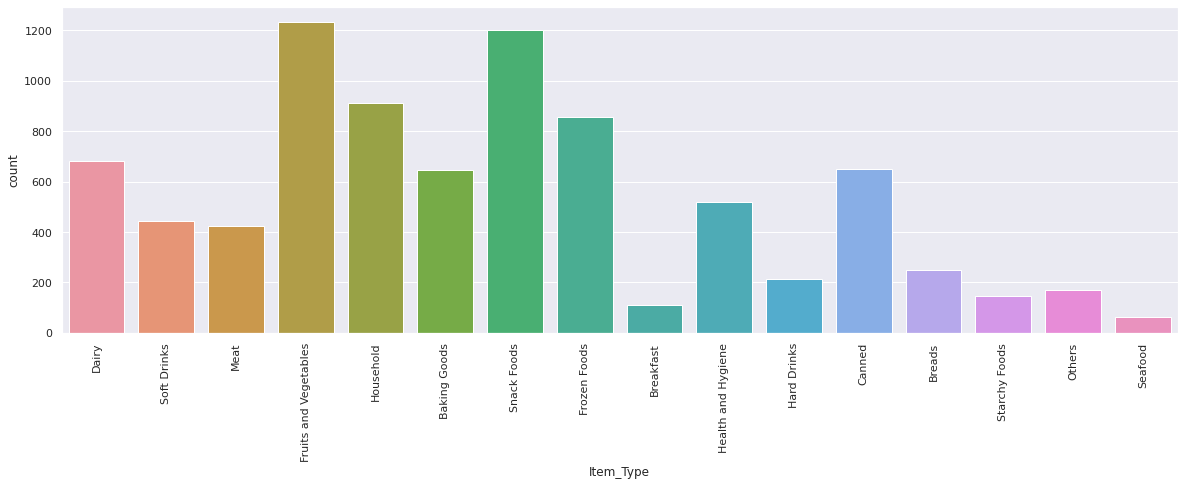

In [27]:
# Item_Types
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type', data=df)
plt.xticks(rotation=90)
plt.show()

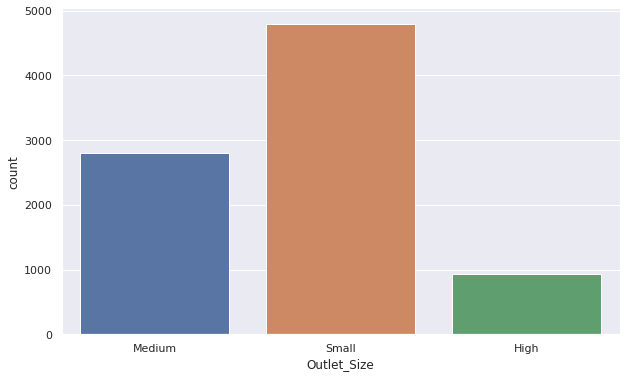

In [28]:
# Outlet_Size
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

## Data Pre-Processing

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

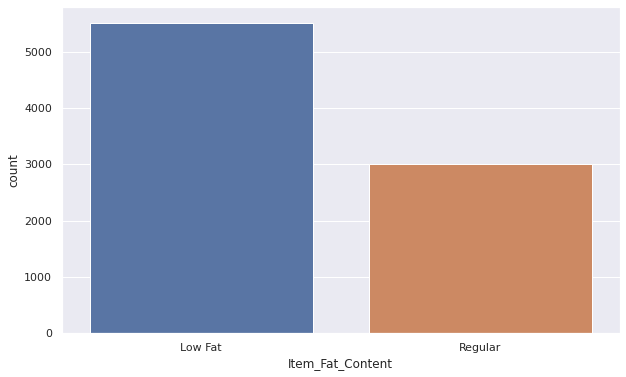

In [33]:
# Item_Fat_Content updated
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

## Label Encoding

In [34]:
encoder = LabelEncoder()

In [35]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting Features and Target

In [37]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [38]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [39]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## Splitting the data into Training & Testing Data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training

## (1) Linear Regressor

In [42]:
regressor = LinearRegression()

In [43]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Evaluation

In [44]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

R2 value is also known as coefficient of determination in statistics.

In [45]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [46]:
print('R Squared value = ', r2_train)

R Squared value =  0.5071929167339231


In [47]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [48]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [49]:
print('R Squared value = ', r2_test)

R Squared value =  0.48912987193626367


## (2) *XGBoost* Regressor

In [50]:
regressor = XGBRegressor()

In [51]:
regressor.fit(X_train, Y_train)

[06:05:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Evaluation

In [52]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [53]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [54]:
print('R Squared value = ', r2_train)

R Squared value =  0.6364457030941357


In [55]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [56]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [57]:
print('R Squared value = ', r2_test)

R Squared value =  0.5867640914432671


## Let's try out other Algos and Metrics to see if we have better options or not?

In [58]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [59]:
algos = [XGBRegressor(),LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]
names = ['XGB Regression','Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression']
rmse_list = []
mae_list = []
r2_list = []


In [60]:
for name in algos:
    model = name
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(Y_test, y_pred)
    mae = metrics.mean_absolute_error(Y_test,y_pred)
    r2_value = metrics.r2_score(Y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2_value)

[06:05:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
evaluation = pd.DataFrame({'Model': names, 'RMSE': rmse_list, 'MAE':mae_list, 'R2_Value':r2_list})

In [62]:
evaluation

,Model,RMSE,MAE,R2_Value
0,XGB Regression,1129.464529,788.962189,0.586764
1,Linear Regression,1255.824133,944.869172,0.489130
2,Ridge Regression,1255.930062,945.019764,0.489044
3,Lasso Regression,1256.570456,945.904781,0.488522
4,K Neighbors Regression,1594.217570,1123.247945,0.176719
5,Decision Tree Regression,1574.011083,1149.028112,0.197457


As we can clearly see Linear Regression performs slighlty better than Ridge and Lasso regression. KNN Regressor and Decision Tree Regressor do not improve the score.

From RMSE, MAE and R2 values we can say XGBoost Regressor is a good fit. 

# We have XGBoost Regressor performing well in this case.

# **I hope you liked the analysis**
# **Thanks**